# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# PCA

In [2]:
#PCA Implementation
def PCA(data,name):
    data_trim = data.iloc[:,:-1]
    y = data.iloc[:,-1]    
    
    #Calculate mean for all columns     
    mean = data_trim.mean()    
    
    #Calculate variance
    for i in range(len(data_trim.columns)): 
        data_trim[i] = data_trim[i].apply(lambda x: x - mean[i])        
    data_trim = np.array(data_trim)    
    
    #Calculate the covariance matrix
    covariance_matrix = np.matmul(data_trim.T,data_trim)/(len(data_trim)-1)    
    
    #Calculate the eigenvalues and the corresponding eigenvectors
    values, vectors = np.linalg.eig(covariance_matrix)
    values = np.asmatrix(values)
    vectors = np.append(vectors, values.T, axis=1)
    vectors = np.array(vectors)
    vectors = vectors[vectors[:,len(vectors)].argsort()[::-1]]
    vectors = vectors[:,:-1]    
    
    #Calculate the principal components
    PC1 = data_trim.dot(vectors.T[0])
    PC2= data_trim.dot(vectors.T[1])
    res = pd.DataFrame(PC1, columns=['PC1'])
    res['PC2'] = PC2
    
    res['Y'] = y
    visualize(res,y,"PCA - "+name)

#Function for visualization
def visualize(res,y,title):
    fig = plt.figure(figsize = (7,7))
    gph = fig.add_subplot(1,1,1) 
    gph.set_xlabel('PC1', fontsize = 12)
    gph.set_ylabel('PC2', fontsize = 12)
    gph.set_title(title, fontsize = 18)
    targets = np.unique(y)
    for i in targets:
        index = res.iloc[:,-1] == i
        gph.scatter(res.loc[index, 'PC1']
                   , res.loc[index, 'PC2']
                   , s = 50)
    gph.legend(targets)
    gph.grid()
    

# SVD

In [3]:
def SVD(data, name):
    u, s, v = np.linalg.svd(data.iloc[:,:-1], full_matrices=False)
    PC1 = u[:,0]
    PC2= u[:,1]
    res = pd.DataFrame(PC1, columns=['PC1'])
    res['PC2'] = PC2
    res['Y'] = data.iloc[:,-1]
    visualize(res,data.iloc[:,-1],"SVD - "+name)

# t-SNE

In [4]:
def calTSNE(data, name):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_obj= tsne.fit_transform(data.iloc[:,:-1])
    PC1 = tsne_obj[:,0]
    PC2= tsne_obj[:,1]
    res = pd.DataFrame(PC1, columns=['PC1'])
    res['PC2'] = PC2
    res['Y'] = data.iloc[:,-1]
    visualize(res,data.iloc[:,-1],"t-SNE - "+name)

# Load Data

In [5]:
input_demoData = input("Enter file name: ")
pca_demo_data = pd.read_csv(input_demoData, delimiter="\t", header=None)

pca_a_data = pd.read_csv("pca_a.txt", delimiter="\t", header=None)
pca_b_data = pd.read_csv("pca_b.txt", delimiter="\t", header=None)
pca_c_data = pd.read_csv("pca_c.txt", delimiter="\t", header=None)

Enter file name: pca_demo.txt


# PCA Plots

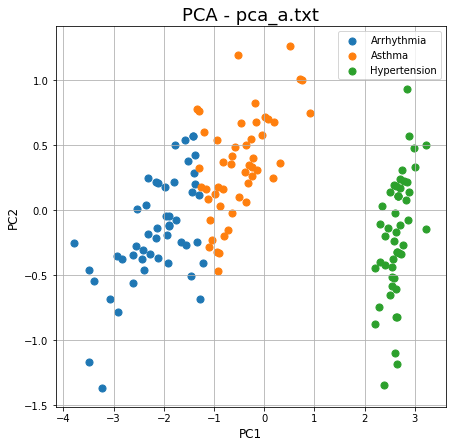

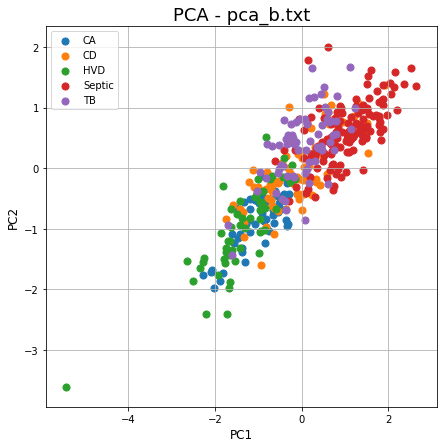

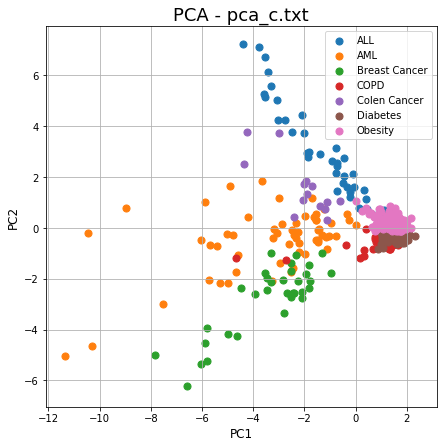

In [6]:
PCA(pca_a_data, "pca_a.txt")
PCA(pca_b_data, "pca_b.txt")
PCA(pca_c_data, "pca_c.txt")
# PCA(pca_demo_data, "pca_demo_data")

# SVD Plots

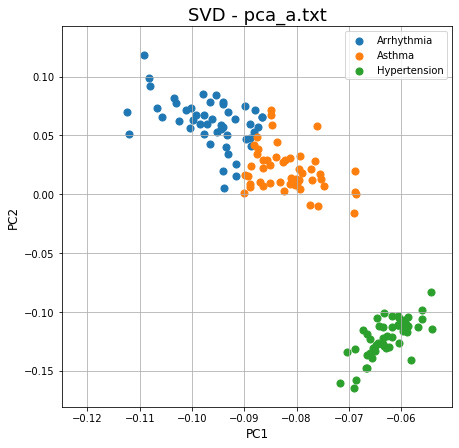

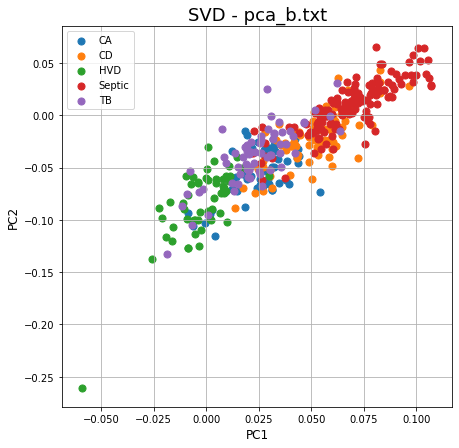

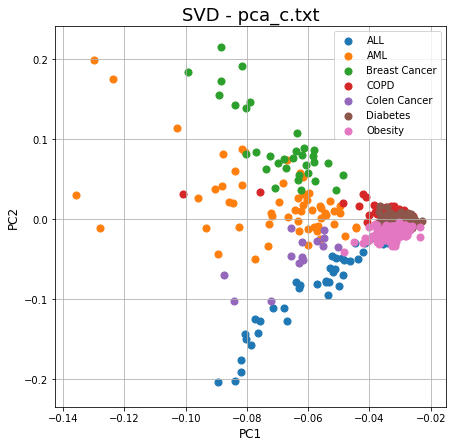

In [7]:
SVD(pca_a_data, "pca_a.txt")
SVD(pca_b_data, "pca_b.txt")
SVD(pca_c_data, "pca_c.txt")
# SVD(pca_demo_data, "pca_demo_data")

# t-SNE Plots

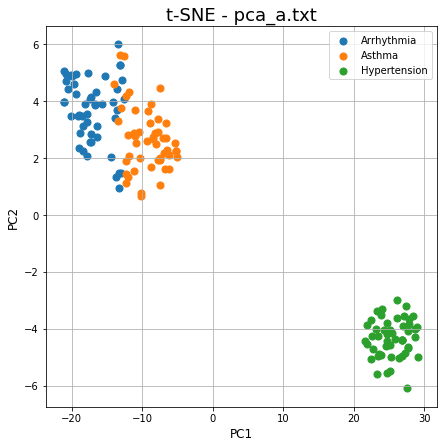

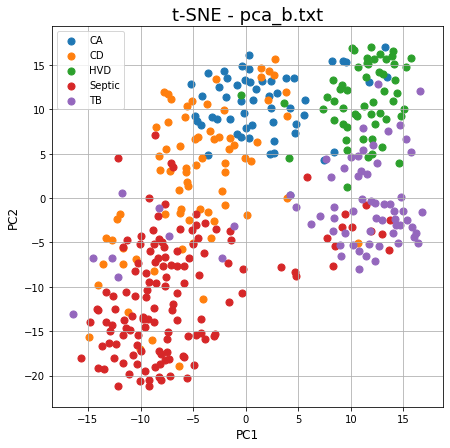

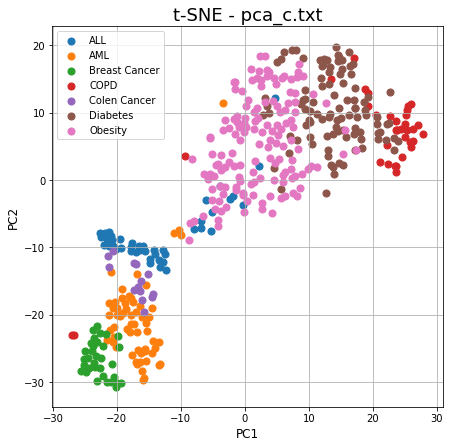

In [8]:
calTSNE(pca_a_data, "pca_a.txt")
calTSNE(pca_b_data, "pca_b.txt")
calTSNE(pca_c_data, "pca_c.txt")
# calTSNE(pca_demo_data, "pca_demo_data")